# Fitting A Gaussian to a Spectral Line

In [1]:
# Imports
from datetime import datetime, timedelta

import numpy as np
from astropy.io import fits
from astropy.modeling import models, fitting
import matplotlib.pyplot as plt
from scipy.integrate import trapz
import astropy.units as u

In [2]:
% matplotlib inline

## Extract Data from a FIT File

In [3]:
filename = '/Users/dnryan/sunpy/data/EVS_L2_2011045_01_005_01.fit'

In [4]:
hdulist = fits.open(filename)

In [5]:
len(hdulist)

4

In [6]:
hdulist[0].header

SIMPLE  =                    T /Dummy Created by MWRFITS v1.11                  
BITPIX  =                    8 /Dummy primary header created by MWRFITS         
NAXIS   =                    0 /No data is associated with this header          
EXTEND  =                    T /Extensions may (will!) be present               

In [7]:
hdulist[1].header

XTENSION= 'BINTABLE'           /Binary table written by MWRFITS v1.11           
BITPIX  =                    8 /Required value                                  
NAXIS   =                    2 /Required value                                  
NAXIS1  =                    8 /Number of bytes per row                         
NAXIS2  =                 5200 /Number of rows                                  
PCOUNT  =                    0 /Normally 0 (no varying arrays)                  
GCOUNT  =                    1 /Required value                                  
TFIELDS =                    2 /Number of columns in table                      
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
EXTNAME = 'SpectrumMeta'                                                        
TUNIT1  = 'nm'              

In [8]:
hdulist[2].header

XTENSION= 'BINTABLE'           /Binary table written by MWRFITS v1.11           
BITPIX  =                    8 /Required value                                  
NAXIS   =                    2 /Required value                                  
NAXIS1  =                  786 /Number of bytes per row                         
NAXIS2  =                    1 /Number of rows                                  
PCOUNT  =                    0 /Normally 0 (no varying arrays)                  
GCOUNT  =                    1 /Required value                                  
TFIELDS =                   10 /Number of columns in table                      
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
EXTNAME = 'SpectrumUnits'                                                       
COMMENT                     

In [9]:
hdulist[3].header

XTENSION= 'BINTABLE'           /Binary table written by MWRFITS v1.11           
BITPIX  =                    8 /Required value                                  
NAXIS   =                    2 /Required value                                  
NAXIS1  =                67630 /Number of bytes per row                         
NAXIS2  =                  360 /Number of rows                                  
PCOUNT  =                    0 /Normally 0 (no varying arrays)                  
GCOUNT  =                    1 /Required value                                  
TFIELDS =                   10 /Number of columns in table                      
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
ORIGIN  = '            SDO/EVE SPOC' // LASP, University of Colorado, Boulder   
DATE    = '2014-12-03T15:32:

## Plot Spectrum

(5, 40)

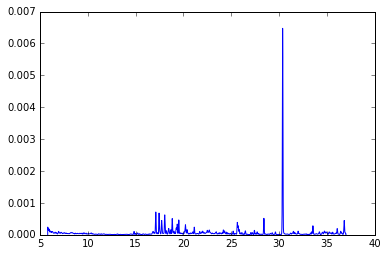

In [11]:
plt.plot(hdulist[1].data["WAVELENGTH"], hdulist[3].data[0]["IRRADIANCE"])
plt.ylim(0, 0.007)
plt.xlim(5, 40)

In [12]:
w = np.logical_and(hdulist[1].data["WAVELENGTH"] > 30.2, hdulist[1].data["WAVELENGTH"] < 30.6)

In [13]:
w

array([False, False, False, ..., False, False, False], dtype=bool)

In [14]:
wavelength = hdulist[1].data["WAVELENGTH"][w]

In [15]:
wavelength

array([ 30.20999908,  30.22999954,  30.25      ,  30.27000046,
        30.29000092,  30.30999947,  30.32999992,  30.35000038,
        30.37000084,  30.38999939,  30.40999985,  30.43000031,
        30.45000076,  30.46999931,  30.48999977,  30.51000023,
        30.53000069,  30.54999924,  30.56999969,  30.59000015], dtype=float32)

In [16]:
wavelength = u.Quantity(wavelength, unit="nm")

In [17]:
irr = hdulist[3].data[0]["IRRADIANCE"][w]

In [18]:
irr = u.Quantity(irr, unit="W/m**2")

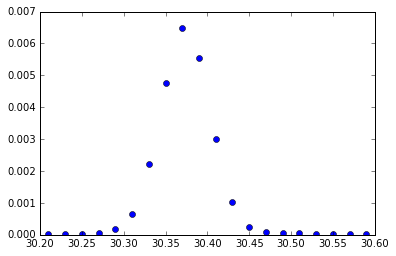

In [21]:
plt.plot(wavelength, irr, 'o')

## Fit He II 304 line with a Gaussian

In [22]:
g_init = models.Gaussian1D(0.007, 30.4, .2)

In [23]:
fit_g = fitting.LevMarLSQFitter()

In [24]:
g = fit_g(g_init, wavelength, irr)

In [26]:
g.mean

Parameter('mean', value=30.3733491452)

In [27]:
g.stddev

Parameter('stddev', value=0.029547785343)

In [29]:
g.amplitude

Parameter('amplitude', value=0.00651223358276)

In [28]:
g

<Gaussian1D(amplitude=0.006512233582758824, mean=30.373349145178118, stddev=0.029547785343013666)>

In [30]:
x = np.linspace(30.2, 30.6, 1000)

In [31]:
y = g(x)

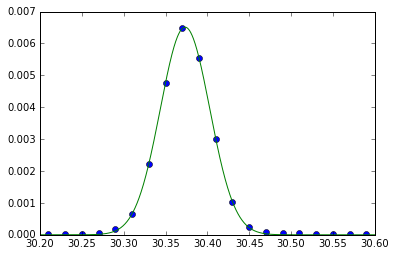

In [32]:
plt.plot(wavelength, irr, 'o')
plt.plot(x, y)

## Integrate Gaussian Fit

In [33]:
intensity = trapz(y,x)

In [34]:
intensity

0.00048233062533621857

## Produce a Light Curve of He II 304 From All Spectra in File.

In [35]:
x = np.linspace(30.2, 30.6, 1000)
intensity = []
w = np.logical_and(hdulist[1].data["WAVELENGTH"] > 30.2, hdulist[1].data["WAVELENGTH"] < 30.6)
wavelength = hdulist[1].data["WAVELENGTH"][w]
for spectrum in hdulist[3].data:
    irr = spectrum["IRRADIANCE"][w]
    g_init = models.Gaussian1D(0.007, 30.4, .2)
    fit_g = fitting.LevMarLSQFitter()
    g = fit_g(g_init, wavelength, irr)
    y = g(x)
    intensity.append(trapz(y,x))
intensity = u.Quantity(intensity, unit="nm")

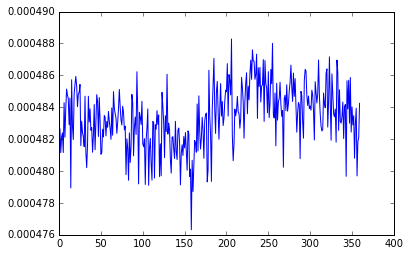

In [36]:
plt.plot(intensity)